In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [10]:
import requests
requests.__version__

'2.24.0'

In [11]:
# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# # Create an empty list to hold the weather data
# city_data = []
# # Print the beginning of the logging
# print("Beginning Data Retrieval      ")
# print("------------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city
#     city_url = url + "&q=" + cities[i]

In [15]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | myitkyina
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | shar
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | changping
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | lolua
City not found. Skipping...
Processing Record 14 of Set 1 | xai-xai
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | rabo de peixe
Processing Record 19 of Set 1 | brus laguna
Processing Record 20 of Set 1 | kropotkin
Processing Record 21 of Set 1 | nikolskoye
Processing

Processing Record 38 of Set 4 | orapa
Processing Record 39 of Set 4 | vanavara
Processing Record 40 of Set 4 | front royal
Processing Record 41 of Set 4 | qaqortoq
Processing Record 42 of Set 4 | celestun
Processing Record 43 of Set 4 | champerico
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | tabuk
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | mayumba
Processing Record 48 of Set 4 | jasper
Processing Record 49 of Set 4 | makakilo city
Processing Record 50 of Set 4 | egvekinot
Processing Record 1 of Set 5 | pergine valsugana
Processing Record 2 of Set 5 | galgani
City not found. Skipping...
Processing Record 3 of Set 5 | hobart
Processing Record 4 of Set 5 | baruun-urt
Processing Record 5 of Set 5 | imbituba
Processing Record 6 of Set 5 | isla vista
Processing Record 7 of Set 5 | okhotsk
Processing Record 8 of Set 5 | gravdal
Processing Record 9 of Set 5 | grand river south east
City not found. Skipping

Processing Record 29 of Set 8 | bambous virieux
Processing Record 30 of Set 8 | northam
Processing Record 31 of Set 8 | dekar
Processing Record 32 of Set 8 | necochea
Processing Record 33 of Set 8 | tura
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | tobol
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | pravia
Processing Record 38 of Set 8 | namatanai
Processing Record 39 of Set 8 | lamu
Processing Record 40 of Set 8 | jahrom
City not found. Skipping...
Processing Record 41 of Set 8 | sug-aksy
City not found. Skipping...
Processing Record 42 of Set 8 | paracatu
Processing Record 43 of Set 8 | aksu
Processing Record 44 of Set 8 | tiarei
Processing Record 45 of Set 8 | taga dzong
City not found. Skipping...
Processing Record 46 of Set 8 | bilma
Processing Record 47 of Set 8 | veraval
Processing Record 48 of Set 8 | namibe
Processing Record 49 of Set 8 | lipin bor
Processing Record 50 of Set 8 | pimenta bueno
Processing Record 1 of Set

Processing Record 17 of Set 12 | meyungs
City not found. Skipping...
Processing Record 18 of Set 12 | los llanos de aridane
Processing Record 19 of Set 12 | ostrovnoy
Processing Record 20 of Set 12 | sisimiut
Processing Record 21 of Set 12 | ormond beach
Processing Record 22 of Set 12 | bani walid
Processing Record 23 of Set 12 | loa janan
Processing Record 24 of Set 12 | verkh-usugli
Processing Record 25 of Set 12 | weingarten
Processing Record 26 of Set 12 | dutlwe
Processing Record 27 of Set 12 | bartica
Processing Record 28 of Set 12 | keningau
Processing Record 29 of Set 12 | kitui
Processing Record 30 of Set 12 | iwaki
Processing Record 31 of Set 12 | ajdabiya
Processing Record 32 of Set 12 | svetlogorsk
Processing Record 33 of Set 12 | neiafu
Processing Record 34 of Set 12 | thunder bay
Processing Record 35 of Set 12 | piacabucu
Processing Record 36 of Set 12 | druzhba
Processing Record 37 of Set 12 | whyalla
Processing Record 38 of Set 12 | omsukchan
Processing Record 39 of Set

In [16]:
len(city_data)

557

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.15,69,8,5.50,PF,2021-04-14 23:14:47
1,Myitkyina,25.3833,97.4000,67.10,50,5,1.79,MM,2021-04-14 23:16:38
2,Shar,49.5886,81.0453,38.21,74,40,3.13,KZ,2021-04-14 23:16:38
3,Mar Del Plata,-38.0023,-57.5575,68.00,72,0,4.61,AR,2021-04-14 23:13:31
4,Thompson,55.7435,-97.8558,39.20,20,40,3.44,CA,2021-04-14 23:16:30
5,Vaini,-21.2000,-175.2000,80.60,74,40,8.05,TO,2021-04-14 23:16:39
6,Albany,42.6001,-73.9662,66.20,42,75,3.44,US,2021-04-14 23:14:41
7,Changping,40.2186,116.2197,55.00,54,0,6.71,CN,2021-04-14 23:16:39
8,Barrow,71.2906,-156.7887,15.80,73,1,13.80,US,2021-04-14 23:15:57
9,Hermanus,-34.4187,19.2345,64.00,88,18,3.00,ZA,2021-04-14 23:16:32


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-14 23:14:47,-23.1203,-134.9692,78.15,69,8,5.50
1,Myitkyina,MM,2021-04-14 23:16:38,25.3833,97.4000,67.10,50,5,1.79
2,Shar,KZ,2021-04-14 23:16:38,49.5886,81.0453,38.21,74,40,3.13
3,Mar Del Plata,AR,2021-04-14 23:13:31,-38.0023,-57.5575,68.00,72,0,4.61
4,Thompson,CA,2021-04-14 23:16:30,55.7435,-97.8558,39.20,20,40,3.44
5,Vaini,TO,2021-04-14 23:16:39,-21.2000,-175.2000,80.60,74,40,8.05
6,Albany,US,2021-04-14 23:14:41,42.6001,-73.9662,66.20,42,75,3.44
7,Changping,CN,2021-04-14 23:16:39,40.2186,116.2197,55.00,54,0,6.71
8,Barrow,US,2021-04-14 23:15:57,71.2906,-156.7887,15.80,73,1,13.80
9,Hermanus,ZA,2021-04-14 23:16:32,-34.4187,19.2345,64.00,88,18,3.00


In [19]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

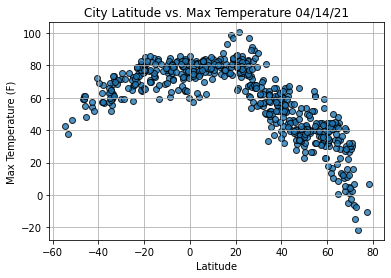

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

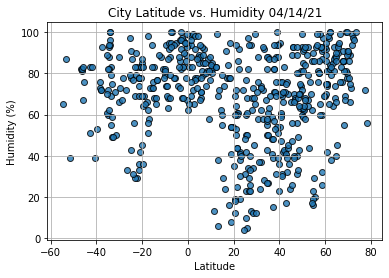

In [22]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

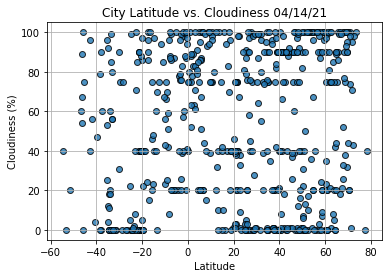

In [23]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

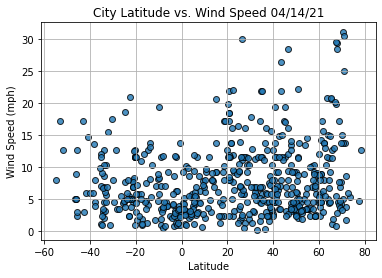

In [24]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                     Coquimbo
Country                        CL
Date          2021-04-14 23:12:54
Lat                      -29.9533
Lng                      -71.3436
Max Temp                       59
Humidity                       88
Cloudiness                     90
Wind Speed                   8.05
Name: 13, dtype: object

In [49]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Myitkyina,MM,2021-04-14 23:16:38,25.3833,97.4000,67.10,50,5,1.79
2,Shar,KZ,2021-04-14 23:16:38,49.5886,81.0453,38.21,74,40,3.13
4,Thompson,CA,2021-04-14 23:16:30,55.7435,-97.8558,39.20,20,40,3.44
6,Albany,US,2021-04-14 23:14:41,42.6001,-73.9662,66.20,42,75,3.44
7,Changping,CN,2021-04-14 23:16:39,40.2186,116.2197,55.00,54,0,6.71


In [50]:
# Create northern and southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

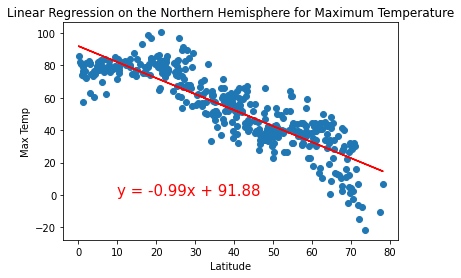

LinregressResult(slope=-0.9880088559661696, intercept=91.88221519343175, rvalue=-0.8685317805323806, pvalue=7.302205347188159e-122, stderr=0.028440647707783706)

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,0))
linregress(x_values,y_values)

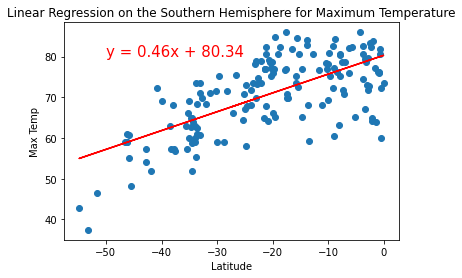

LinregressResult(slope=0.4629209110831313, intercept=80.34299511213626, rvalue=0.6733161833170453, pvalue=9.644012733213324e-23, stderr=0.04018653586174752)

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature", 'Max Temp',(-50,80))
linregress(x_values,y_values)

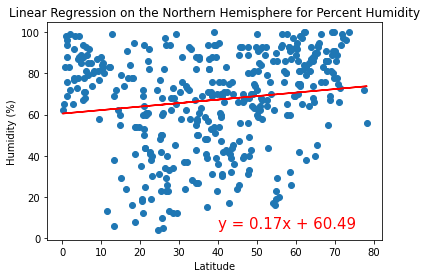

LinregressResult(slope=0.1699565835943611, intercept=60.494730213509726, rvalue=0.1460375271950975, pvalue=0.0036276058245740673, stderr=0.05807591477171487)

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Percent Humidity", 'Humidity (%)',(40,5))
linregress(x_values,y_values)

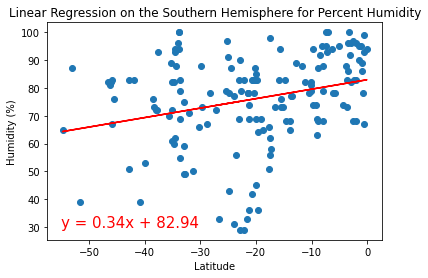

LinregressResult(slope=0.33968433904544354, intercept=82.94398717261588, rvalue=0.2814490402390675, pvalue=0.0002854660292972228, stderr=0.09155777246410877)

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Percent Humidity", 'Humidity (%)',(-55,30))
linregress(x_values,y_values)

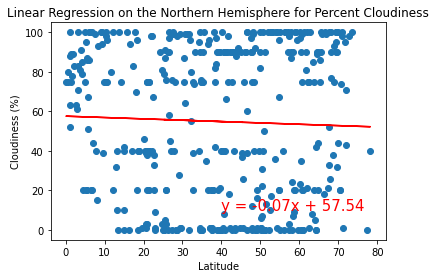

LinregressResult(slope=-0.06824463313348542, intercept=57.542843295604406, rvalue=-0.03621712419197788, pvalue=0.4729080946732829, stderr=0.09498898591190648)

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Percent Cloudiness", 'Cloudiness (%)',(40,10))
linregress(x_values,y_values)

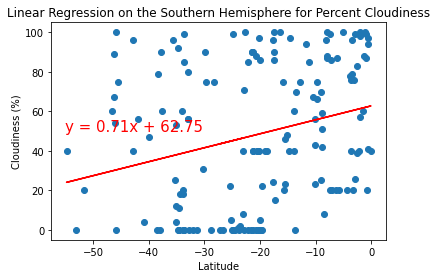

LinregressResult(slope=0.7058544763245511, intercept=62.75096261972966, rvalue=0.26595000781090944, pvalue=0.0006248486960042417, stderr=0.20226757680059468)

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Percent Cloudiness", 'Cloudiness (%)',(-55,50))
linregress(x_values,y_values)

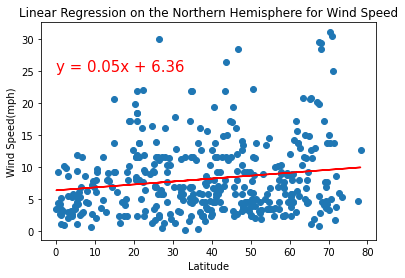

LinregressResult(slope=0.04586474819351455, intercept=6.36400341633251, rvalue=0.1606133990740041, pvalue=0.0013608459569084796, stderr=0.014217582968412266)

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed", 'Wind Speed(mph)',(0,25))
linregress(x_values,y_values)

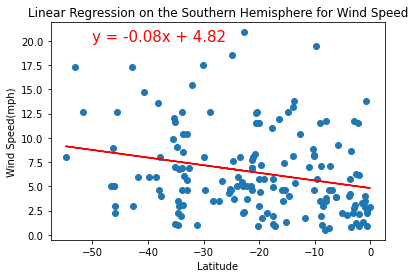

LinregressResult(slope=-0.07867242338038183, intercept=4.82147916672861, rvalue=-0.24645015820617477, pvalue=0.0015700342549941405, stderr=0.024458334798379975)

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed", 'Wind Speed(mph)',(-50,20))
linregress(x_values,y_values)